In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import math

## Homework 1.3.1 - Pythagorean Problem

Consider three bodies of mass, $m1 = 3$, $m_2 = 4$, and $m_3 = 5$, located coordinate $(x, y)$ at $(1, 3)$, $(-2, -1)$ and $(1, -1)$ respectively. All are initially at rest. The interaction between particles are given by Newton's second law of motion and Newton's gravitational law:

$${{\vec F}_i} = {m_i}{a_i} =  - G\sum\limits_{i \ne j} {{m_i}{m_j}\frac{{{{\vec r}_i} - {{\vec r}_j}}}{{{{\left| {{{\vec r}_i} - {{\vec r}_j}} \right|}^3}}}} $$

Using $G = 4 \pi^2$, investigate the motion of the particles from $t = 0$ to $t = 10$

In [4]:
t = np.arange(0., 5.0, 0.002)
G = 4*math.pi
m1 = 3
m2 = 4
m3 = 5
ms = np.array([m1, m2, m3])

# [x1, y1, vx1, vy1, x2, y2, vx2, vy2, x3, y3, vx3, vy3]
y0 = np.array([1., 3., 0., 0., -2., -1., 0., 0., 1., -1., 0., 0.])
def rhs(ms, ys, t):
    # [y[2], y[3], ax1, ay1, y[6], y[7], ax2, ay2, y[10], y[11], ax3, ay3]
    a_list = []
    # find zigma
    for i in range(len(ms)):
        zigma = 0
        for j in range(len(ms)):
            if i==j:continue
            # put in formula
            zigma += ms[i]*ms[j]*(ys[i*4:i*4+2]-ys[j*4:j*4+2])/(np.linalg.norm((ys[i*4:i*4+2]-ys[j*4:j*4+2]))**3)
        a = (-G*zigma)/ms[i]
        a_list.append(a)
    res = [ys[2], ys[3]]
    # extract ax1, ay1
    res.extend(a_list[0])
    res.extend([ys[6],ys[7]])
    # extract ax2, ay2
    res.extend(a_list[1])
    res.extend([ys[10],ys[11]])
    # extract ax3, ay3
    res.extend(a_list[2])
    return res

res = odeint(lambda y, t: rhs(ms, y, t), y0, t)

(-2.0, 3.0)

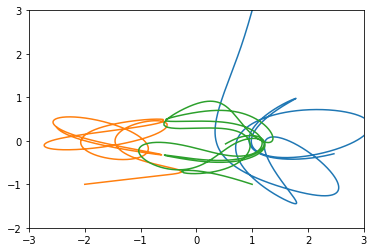

In [5]:
plt.plot(res[:,0], res[:,1])
plt.plot(res[:,4], res[:,5])
plt.plot(res[:,8], res[:,9])
plt.xlim(-3,3)
plt.ylim(-2,3)

___
## Homework 1.3.2 - Double Pendulum
![alt text](images/double-pendulum.png "Double Pendulum")

The equations of motion for the double pendulum are given by [from http://scienceworld.wolfram.com/physics/DoublePendulum.html]:

$$({m_1} + {m_2}){l_1}{{\ddot \theta }_1} + {m_2}{l_2}{{\ddot \theta }_2}\cos ({\theta _1} - {\theta _2}) + {m_2}{l_2}{({{\dot \theta }_2})^2}\sin ({\theta _1} - {\theta _2}) + ({m_1} + {m_2})g\sin {\theta _1} = 0$$

$${m_2}{l_2}{{\ddot \theta }_2} + {m_2}{l_1}{{\ddot \theta }_1}\cos ({\theta _1} - {\theta _2}) - {m_2}{l_1}{({{\dot \theta }_1})^2}\sin ({\theta _1} - {\theta _2}) + {m_2}g\sin {\theta _2} = 0$$

Given that $l_1 = 1$, $l_2 = 2$, $m_1 = 2$, $m_2 = 1$ and $g = 9.8$ $m/s^2$

The initial conditions at $t = 0$ are:

${{\theta }_1}(0) = 1.5$

${{\dot \theta }_1}(0) = 0$

${{\theta }_2}(0) = 3.0$

${{\dot \theta }_2}(0) = 0.0$

Write a program to plots the positions of the mass $m_2$ in $x-y$ coordinate over the time interval $0 \le t \le T\; s$. Where $T$ are:

a) 10

b) 100

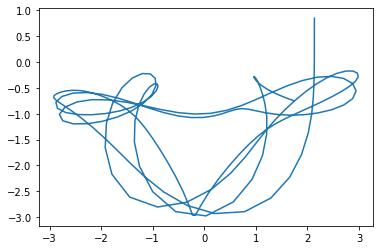

In [6]:
l1 = 2
l2 = 1
m1 = 2
m2 = 1
g = 9.8
y0 = [1.5, 3., 0., 0.]

t = np.arange(0, 10., 0.05)

def pol2cart(r, theta):
    z = r*np.exp(1j * (theta - np.pi/2))
    x, y = z.real, z.imag
    return x, y
def rhs(y, t):
    th1, th2, thd1, thd2 = y
    A = np.zeros((2, 2))
    A[0, 0] = (m1+m2)*l1
    A[0, 1] = m2*l2*np.cos(th1 -th2)
    A[1, 0] = m2*l1*np.cos(th1 - th2)
    A[1, 1] = m2*l2

    b = np.zeros(2)
    b[0] = -m2*l2*(thd2)**2*np.sin(th1 - th2) - (m1 + m2)*g*np.sin(th1)
    b[1] = m2*l1*(thd1)**2*np.sin(th1 - th2) - m2*g*np.sin(th2)

    thdd = np.linalg.solve(A, b)
    return [thd1, thd2, thdd[0], thdd[1]]

th = odeint(rhs, y0, t)

x1, y1 = pol2cart(l1, th[:, 0])
xr2, yr2 = pol2cart(l2, th[:, 1])

x2 = x1 + xr2
y2 = y1 + yr2

plt.plot(x2, y2)